<a href="https://colab.research.google.com/github/dmarinere/NikeCampaign/blob/master/Nike_Campaign_Contd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Importing the libraries:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import warnings
sns.set()

In [3]:
df_infl = pd.read_csv("/content/drive/My Drive/Colab Notebooks/all_influencers_tweets.csv")
df_gov = pd.read_csv("/content/drive/My Drive/Colab Notebooks/all_government_tweets.csv")

In [4]:
#i started with using the assumption that we made about less than 5 tweets
df_infl = df_infl[df_infl['original_author'].map(df_infl['original_author'].value_counts()) > 5]
df_gov = df_gov[df_gov['original_author'].map(df_gov['original_author'].value_counts()) > 5]

In [5]:
#i would start would creating a new dataframe that has no duplicate author so i could get some data
df_new_infl= df_infl.drop_duplicates(subset ="original_author",)
df_new_gov = df_gov.drop_duplicates(subset ="original_author")
df_new_gov.reset_index(drop=True, inplace=True)
df_new_infl.reset_index(drop=True, inplace=True)

In [6]:
#i converted some columns from object to int so we can work with them easily
df_new_infl = df_new_infl.astype({'favorite_count': 'int64', 'retweet_count': 'int64','following': 'int64' })
df_infl = df_infl.astype({'favorite_count': 'int64', 'retweet_count': 'int64','following': 'int64' })

In [7]:
# i would start with getting the reach score for all the influencers and leaders 
df_new_gov['reach'] = df_new_gov.apply(lambda x: float(x['followers']) - float(x['following']), axis=1)
df_new_infl['reach'] = df_new_infl.apply(lambda x: float(x['followers']) - float(x['following']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_new_gov.head()

,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,name,following,followers,hashtags,mention,place_coord_boundaries,location,reach
0,Mon Jun 01 09:04:35 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","""on my windhorse, at sunrise, i come riding"". ...",en,14,7,p,paolo i.,284,34861,NaN,NaN,NaN,trailing away. offshore,34577.0
1,Fri Jul 17 08:18:45 +0000 2020,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@ElderlyBadger I read one of his books and I n...,en,0,0,a,Andrei Zmievski,300,140272,NaN,ElderlyBadger,NaN,"Austin, TX",139972.0
2,Thu Jul 16 21:55:36 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","granite plate, glass door https://t.co/LeMHwJdTSg",en,11,2,u,u,0,313,NaN,NaN,NaN,NaN,313.0
3,Thu Jul 16 17:10:23 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",Our determination to entrench transparency and...,en,1589,411,MBuhari,Muhammadu Buhari,26,3268751,NaN,NaN,NaN,NaN,3268725.0
4,Sat Jul 04 16:09:01 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Tested as we've been by the oddest of the odds...,en,3243,993,PaulKagame,Paul Kagame,181,1981691,NaN,NaN,NaN,"Rwanda, Africa",1981510.0


In [9]:
a = ["u", "p", "a", "KGeorgieva", "paolo i."]
df_new_gov = df_new_gov[~df_new_gov['original_author'].isin(a)]


In [10]:
#we have been able to succesfully get the reach of all the influencer i would go ahead to sort each of them by reach
df_new_infl =df_new_infl.sort_values(by='reach', ascending=False)
df_new_gov=df_new_gov.sort_values(by="reach", ascending=False)
df_new_gov.reset_index(drop=True, inplace=True)
df_new_infl.reset_index(drop=True, inplace=True)

In [11]:
df_gov_rank = df_new_gov[['original_author','name','followers', 'following','reach']]
df_infl_rank = df_new_infl[['original_author','name','followers', 'following','reach']]

In [12]:
#rank them by reach
df_gov_rank["Rank: By Reach"] =df_gov_rank['reach'].rank(ascending=False)
df_infl_rank["Rank: By Reach"] = df_infl_rank['reach'].rank(ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
gov_name = {}
for name in range(len(df_gov_rank)):
     gov_name[df_gov_rank['original_author'][name]]= df_gov_rank['name'][name]

In [14]:
infl_name = {}
for name in range(len(df_infl_rank)):
     infl_name[df_infl_rank['original_author'][name]]= df_infl_rank['name'][name]

In [15]:
df_gov_rank.head()

,original_author,name,followers,following,reach,Rank: By Reach
0,MBuhari,Muhammadu Buhari,3268751,26,3268725.0,1.0
1,PaulKagame,Paul Kagame,1981691,181,1981510.0,2.0
2,KagutaMuseveni,Yoweri K Museveni,1810417,28,1810389.0,3.0
3,PresidencyZA,Presidency | South Africa 🇿🇦,1597615,14,1597601.0,4.0
4,NAkufoAddo,Nana Akufo-Addo,1505263,352,1504911.0,5.0


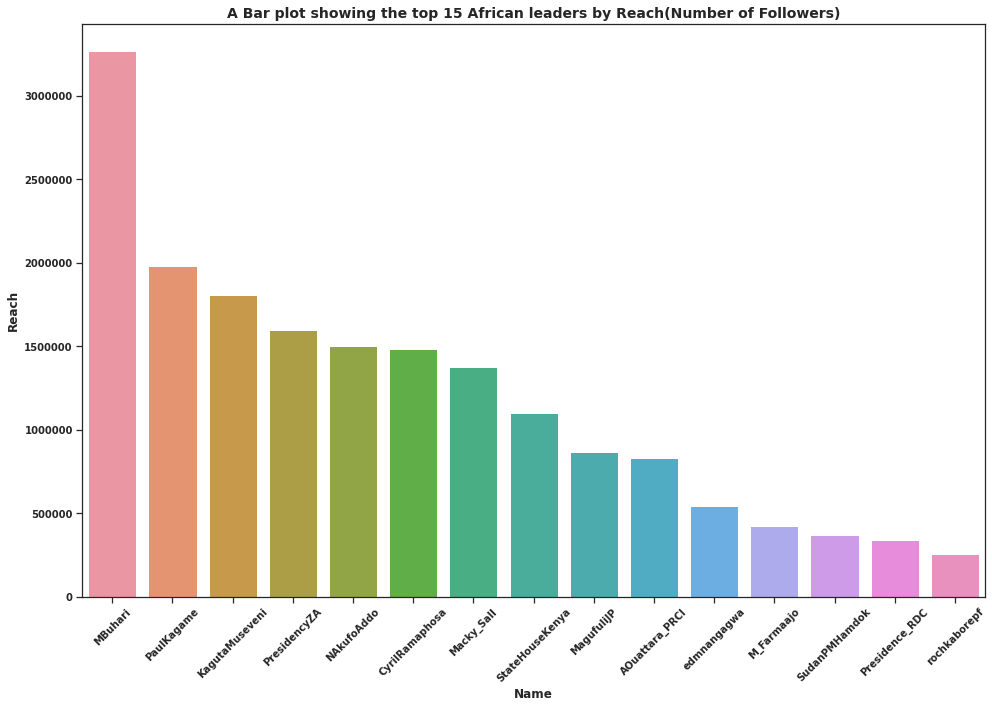

In [16]:
sns.set(style='ticks')
fig = plt.subplots(figsize=(14,10))
chart = sns.barplot(x="original_author", y="reach", data=df_gov_rank[:15])
plt.xticks(fontsize = 10, fontweight='bold')
plt.yticks(fontsize = 10,fontweight='bold')
plt.title("A Bar plot showing the top 15 African leaders by Reach(Number of Followers)", fontsize = 14, fontweight= "bold" )
plt.xlabel("Name",fontsize = 12, fontweight= "bold")
plt.ylabel("Reach",fontsize = 12, fontweight= "bold", fontfamily="sans-serif")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_leader_reach44.jpeg');

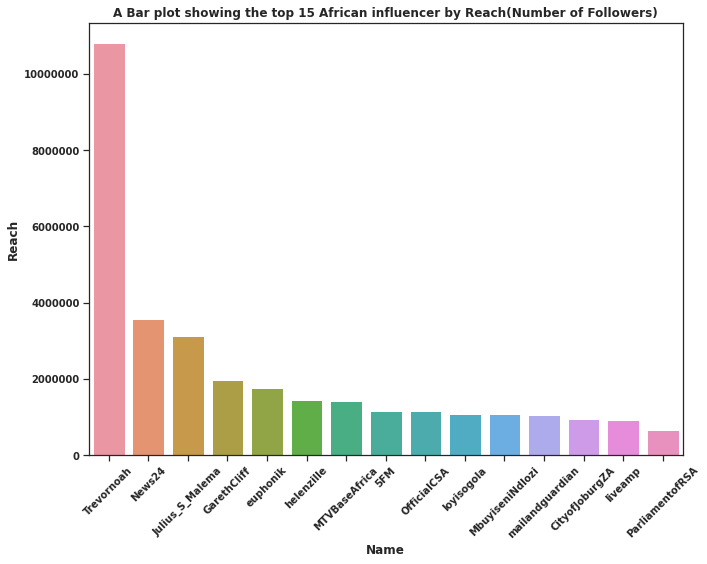

In [17]:
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="original_author", y="reach", data=df_infl_rank[:15])
plt.title("A Bar plot showing the top 15 African influencer by Reach(Number of Followers)",fontsize = 12, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold")
plt.xlabel("Name",fontsize = 12, fontweight= "bold")
plt.ylabel("Reach",fontsize = 12, fontweight= "bold")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_reach.jpeg');

### Cleaning and recovering the rank by number of retweets and likes

In [18]:
#since i didn't get all the tweets for each of them,  i focused on the sum of the top 100 tweets in the dataset 

In [19]:
#then i grouped tweet by author and sort them, then took only the top 100 retweets and like for each
#i sorted first by like because it is easier to get likes and those two work hand in hand
df_infl_popl = df_infl.sort_values(['favorite_count', 'retweet_count'], ascending=False).groupby('original_author').sum().reset_index()
df_gov_popl = df_gov.sort_values(['favorite_count', 'retweet_count'], ascending=False).groupby('original_author').sum().reset_index()

In [20]:
#Then i took only the columns that were important in this popularity analysis which is retweet and like
df_infl_popl = df_infl_popl[["original_author", "retweet_count", "favorite_count"]]
df_gov_popl = df_gov_popl[["original_author", "retweet_count", "favorite_count"]]

In [21]:
df_infl_popl= df_infl_popl.sort_values(["favorite_count", "retweet_count"], ascending=False).reset_index()
df_gov_popl= df_gov_popl.sort_values(["favorite_count", "retweet_count"], ascending=False).reset_index()

In [22]:
df_infl_popl["popularity"] = df_infl_popl['retweet_count'] + df_infl_popl["favorite_count"]
df_gov_popl["popularity"] = df_gov_popl['retweet_count'] + df_gov_popl["favorite_count"]

In [23]:
#here i sorted the values by popularity 
df_infl_popl =df_infl_popl.sort_values(["popularity"], ascending=False).reset_index(drop=True)
df_gov_popl =df_gov_popl.sort_values(["popularity"], ascending=False).reset_index(drop=True)

In [24]:
#here i did the ranking for both datasets 
df_infl_popl["Rank: By Popularity"] = df_infl_popl['popularity'].rank(ascending=False)
df_gov_popl["Rank: By Popularity"] = df_gov_popl['popularity'].rank(ascending=False)

In [25]:
df_gov_popl

,index,original_author,retweet_count,favorite_count,popularity,Rank: By Popularity
0,10,MBuhari,778589,3022579,3801168,1.0
1,17,NAkufoAddo,320983,1650137,1971120,2.0
2,29,SudanPMHamdok,217660,1099351,1317011,3.0
3,9,KagutaMuseveni,160483,898755,1059238,4.0
4,18,PaulKagame,217270,626658,843928,5.0
5,36,edmnangagwa,137996,596197,734193,6.0
6,3,CyrilRamaphosa,121395,606452,727847,7.0
7,13,Macky_Sall,95274,607154,702428,8.0
8,14,MagufuliJP,81387,485459,566846,9.0
9,21,Presidence_RDC,47097,333278,380375,10.0


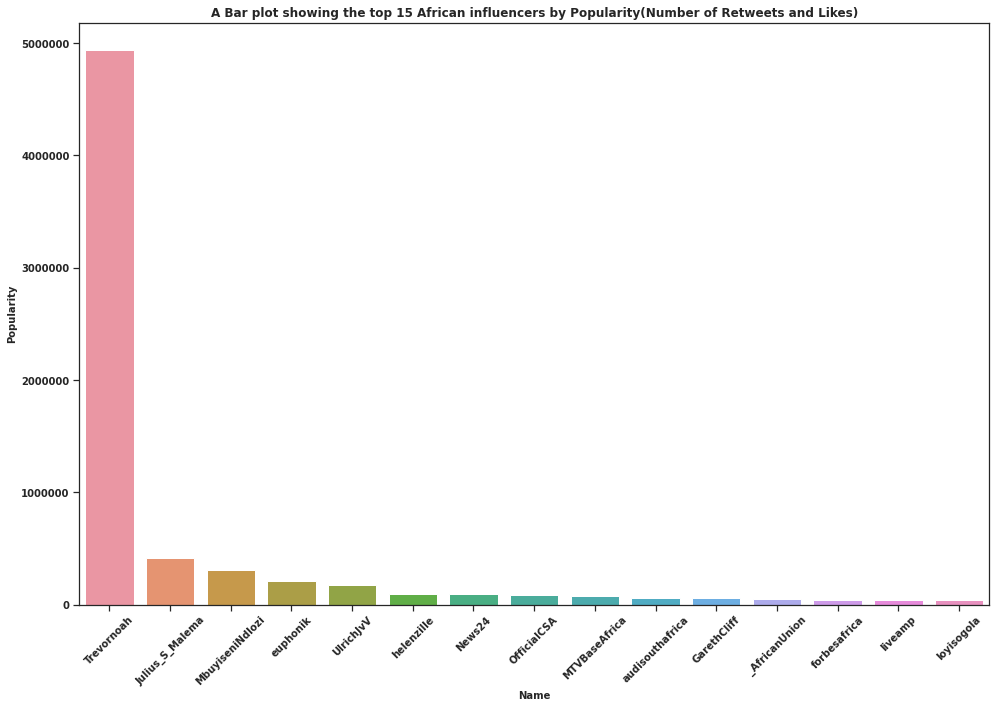

In [26]:
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="original_author", y="popularity", data=df_infl_popl[:15])
plt.title("A Bar plot showing the top 15 African influencers by Popularity(Number of Retweets and Likes)", fontsize = 12, fontweight= "bold" )
plt.xlabel("Name",fontsize = 10, fontweight= "bold")
plt.ylabel("Popularity", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_popl.jpeg');

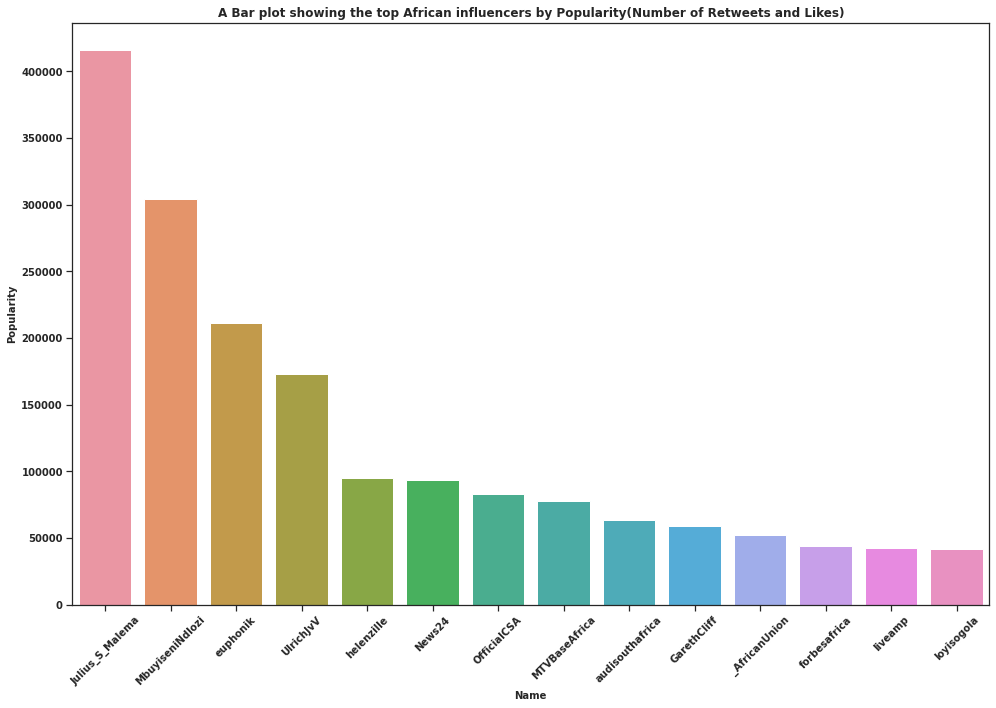

In [27]:
#plot without Trevor Noah
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="original_author", y="popularity", data=df_infl_popl[1:15])
plt.title("A Bar plot showing the top African influencers by Popularity(Number of Retweets and Likes)", fontsize = 12, fontweight= "bold" )
plt.xlabel("Name",fontsize = 10, fontweight= "bold")
plt.ylabel("Popularity", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_popl2.jpeg');

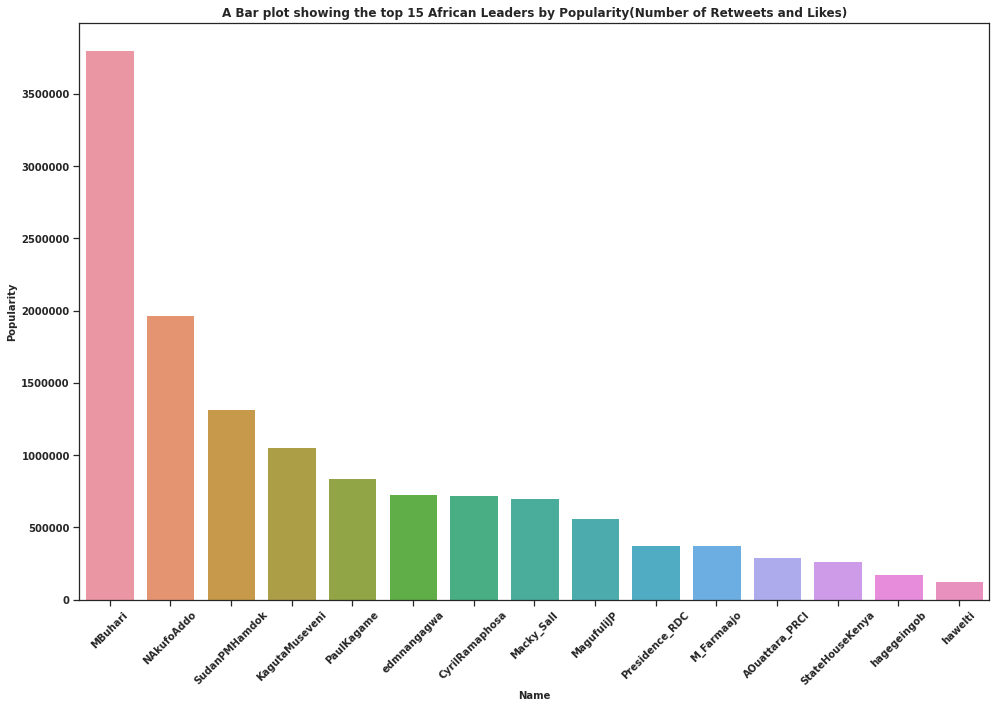

In [28]:
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="original_author", y="popularity", data=df_gov_popl[:15])
plt.title("A Bar plot showing the top 15 African Leaders by Popularity(Number of Retweets and Likes)", fontsize = 12, fontweight= "bold" )
plt.xlabel("Name", fontsize = 10, fontweight= "bold")
plt.ylabel("Popularity", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_leader_popularity.jpeg');

In [29]:
df_gov_popl.head()

,index,original_author,retweet_count,favorite_count,popularity,Rank: By Popularity
0,10,MBuhari,778589,3022579,3801168,1.0
1,17,NAkufoAddo,320983,1650137,1971120,2.0
2,29,SudanPMHamdok,217660,1099351,1317011,3.0
3,9,KagutaMuseveni,160483,898755,1059238,4.0
4,18,PaulKagame,217270,626658,843928,5.0


### Extract the top mentions 

In [30]:
#i created a new dataframe for mentions
df_mentions = df_infl['mention'].str.split(',', expand=True).rename(columns = lambda x: "string"+str(x+1))
df2_mention = df_gov['mention'].str.split(',', expand=True).rename(columns = lambda x: "string"+str(x+1))

In [31]:
#i melted all the values to a column since they are the same thing
new = pd.melt(df_mentions)
new2 = pd.melt(df2_mention)
#i dropped all null values
new = new.dropna(subset=['value'])
new2 = new2.dropna(subset=['value'])
#here i grouped by the number of time a value appeared
new = new.groupby('value').count().reset_index()
new2 = new2.groupby('value').count().reset_index()

In [32]:
#i did this to sort all the values in my data by number of mentions
new.sort_values(by='variable', ascending=False, inplace=True)
new2.sort_values(by='variable', ascending=False, inplace=True)

In [33]:
new.reset_index(drop=True, inplace=True)
new2.reset_index(drop=True, inplace=True)

In [34]:
#i created a list of all the accounts in my original dataset
names = list(df_new_infl['original_author'])
names2 = list(df_new_gov['original_author'])
#i used this to only get mentions of users in our influencers list which is the 
#scope of this project
mentions_infl =new[new['value'].isin(names)]
mentions_gov = new2[new2['value'].isin(names2)]
#i had to reset the index because a lot of rows were dropped
mentions_infl =mentions_infl.reset_index(drop=True)
mentions_gov = mentions_gov.reset_index(drop=True)
#i wanted the columns to have an understandable name 
mentions_infl=mentions_infl.rename(columns={'value' :'original_author',"variable": 'Count'})
mentions_gov=mentions_gov.rename(columns={'value' :'original_author',"variable": 'Count'})

In [35]:
mention_names =list(mentions_infl['original_author']) 
mention_names_gov = list(mentions_gov["original_author"])

In [36]:
df2 = pd.DataFrame({"original_author": mention_names,"Count":[0] * len(mention_names)}) 
df3= pd.DataFrame({"original_author": mention_names_gov, "Count": [0] * len(mention_names_gov)})
# for appending df2 at the end of df1 
mentions_infl =mentions_infl.append(df2, ignore_index=True) 
mentions_gov= mentions_gov.append(df3, ignore_index=True)

In [37]:
mentions_gov["name"] = mentions_gov['original_author'].map(gov_name)
mentions_infl['name'] = mentions_infl['original_author'].map(infl_name)
column_names = ["original_author", "name", "Count"]

mentions_gov = mentions_gov.reindex(columns=column_names)
mentions_infl = mentions_infl.reindex(columns=column_names)

In [38]:
#here i did the ranking for both datasets 
mentions_infl["Rank: By Number of Mentions"] = mentions_infl['Count'].rank(ascending=False)
mentions_gov["Rank: By Number of Mentions"] = mentions_gov['Count'].rank(ascending=False)

In [39]:
mentions_gov.head()

,original_author,name,Count,Rank: By Number of Mentions
0,CyrilRamaphosa,Cyril Ramaphosa 🇿🇦 #StaySafe,190,1.0
1,Macky_Sall,Macky Sall,114,2.0
2,MagufuliJP,Dr John Magufuli,108,3.0
3,mohzambia,Ministry of Health Zambia,74,4.0
4,UNZambia,UN Zambia,55,5.0


In [40]:
mentions_infl.head()

,original_author,name,Count,Rank: By Number of Mentions
0,_AfricanUnion,African Union,96,1.0
1,AfricaCheck,Africa Check,33,2.0
2,TheStar_news,The Star,27,3.0
3,TheAfricaReport,The Africa Report,20,4.0
4,News24,News24,16,5.0


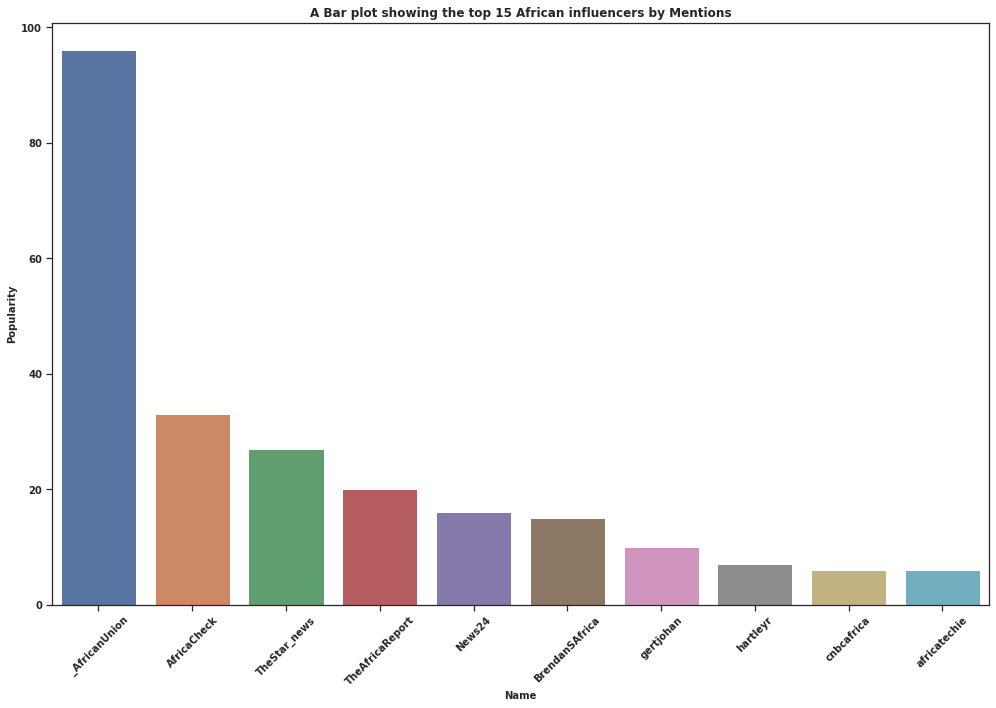

In [41]:
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="original_author", y="Count", data=mentions_infl[:10])
plt.title("A Bar plot showing the top 15 African influencers by Mentions", fontsize= 12, fontweight="bold")
plt.xlabel("Name", fontsize= 10, fontweight="bold")
plt.ylabel("Popularity",fontsize= 10, fontweight="bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_mentions.png');

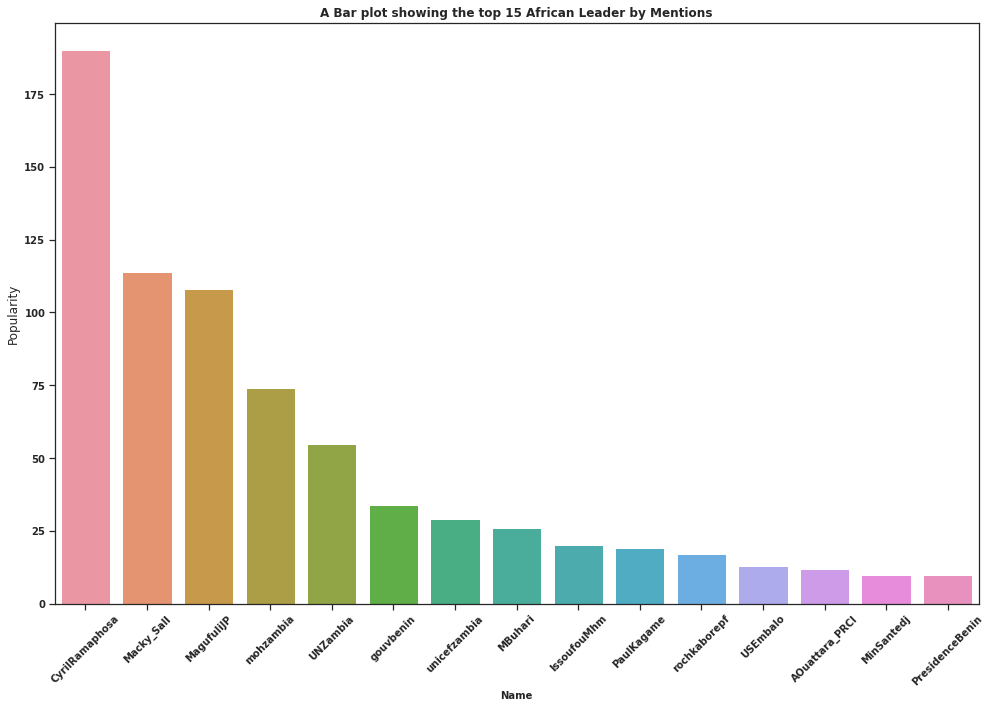

In [42]:
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="original_author", y="Count", data=mentions_gov[:15])
plt.title("A Bar plot showing the top 15 African Leader by Mentions",  fontsize= 12, fontweight="bold")
plt.xlabel("Name", fontsize= 10, fontweight="bold")
plt.ylabel("Popularity")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_gov_mentions.jpeg');

### Extract the top 5 unique hashtags these influencers and government officials used in their top 10 retweets.  Group them based on their top 5 hashtags similarities. 

In [43]:
#this would create a new column for each new string of hashtags in every tweet
hashtags_infl = df_infl['hashtags'].str.split(',', expand=True).rename(columns = lambda x: "hashtag"+str(x+1))
hashtags_gov = df_gov['hashtags'].str.split(',', expand=True).rename(columns = lambda x: "hashtag"+str(x+1))

In [44]:
hashtags_infl['original_author'] = df_infl['original_author']
hashtags_gov['original_author'] = df_gov['original_author']

In [45]:
#this is to drop rows without hashtags they must at least two missing values
hashtags_gov.dropna(thresh=2, inplace=True)
hashtags_infl.dropna(thresh=2, inplace=True)

In [46]:
hashtags_gov =hashtags_gov.melt(id_vars='original_author')
hashtags_infl=hashtags_infl.melt(id_vars='original_author')

In [47]:
hashtags_gov.head()

,original_author,variable,value
0,a,hashtag1,lifegoals
1,a,hashtag1,ImpeachTrump
2,a,hashtag1,Eurovision2019
3,a,hashtag1,Eurovision2019
4,a,hashtag1,Eurovision2019


In [48]:
# i dropped all the null values, those without hashtags
gov = hashtags_gov.dropna()
infl = hashtags_infl.dropna()
#i made everything lower case
infl['value'] = infl["value"].str.lower()
gov['value'] = gov['value'].str.lower()
#i removed space from some hashtags
infl['value'] = infl['value'].str.replace(" ","")
gov['value'] = gov['value'].str.replace(" ","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [49]:
infl= infl.drop(columns='variable')
gov = gov.drop(columns='variable')

In [50]:
#this shows the number of time a particualar hashtag has been used 
hashtag_infl_count = infl['value'].value_counts().head(20)
hashtag_gov_count = gov['value'].value_counts().head(20)

In [51]:
hashtag_infl_count=hashtag_infl_count.reset_index()
hashtag_gov_count=hashtag_gov_count.reset_index()

In [52]:
hashtag_infl_count=hashtag_infl_count.rename(columns={"index": "hashtag", "value": 'count' })
hashtag_gov_count=hashtag_gov_count.rename(columns={"index": "hashtag", "value": 'count' })

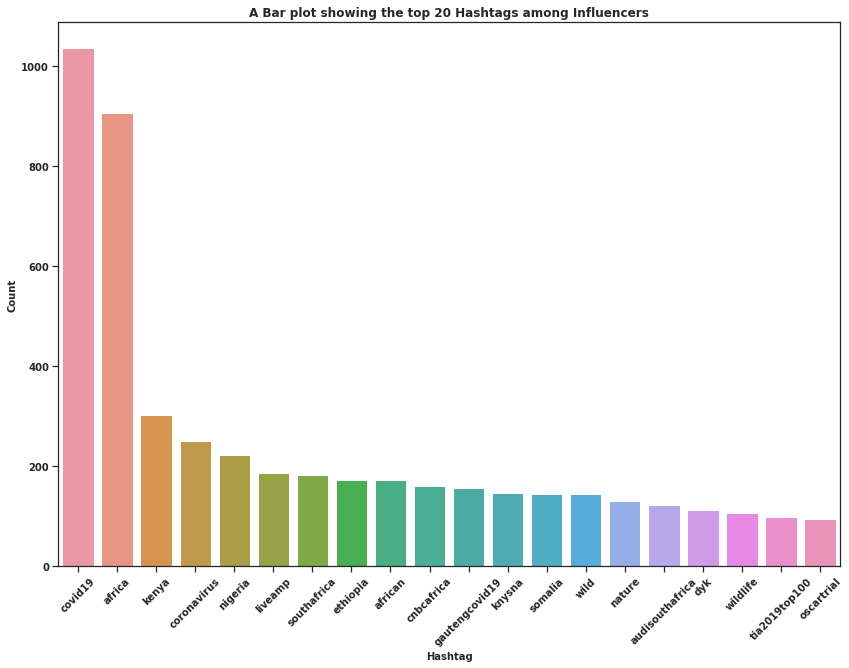

In [53]:
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="hashtag", y="count", data=hashtag_infl_count)
plt.title("A Bar plot showing the top 20 Hashtags among Influencers", fontsize = 12, fontweight= "bold" )
plt.xlabel("Hashtag", fontsize = 10, fontweight= "bold")
plt.ylabel("Count", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_hashtag.jpeg');

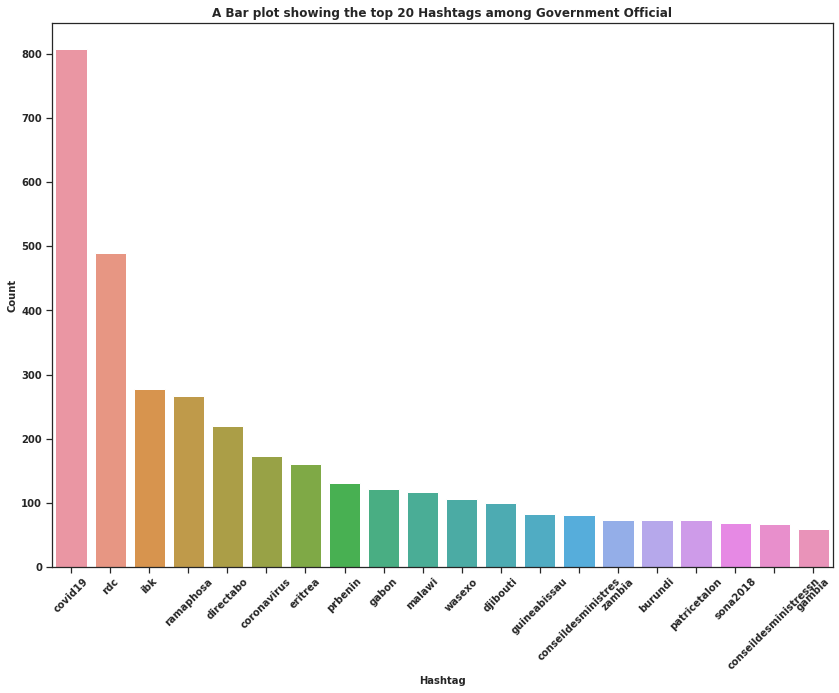

In [55]:
sns.set(style='ticks')
plt.figure(figsize=(14,10))
chart = sns.barplot(x="hashtag", y="count", data=hashtag_gov_count)
plt.title("A Bar plot showing the top 20 Hashtags among Government Official", fontsize = 12, fontweight= "bold" )
plt.xlabel("Hashtag", fontsize = 10, fontweight= "bold")
plt.ylabel("Count", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.savefig('/content/drive/My Drive/Colab Notebooks/african_gov_hashtag.jpeg');

In [ ]:
see =infl.groupby(["value", 'original_author']).count()

In [ ]:
see

In [ ]:
for hashtas in see['value']:
  if hashtas== covi19:
    print()

In [ ]:
#i grouped then and measure by the mean of the hashtags
hashtags_grouped = hashtags_onehot.groupby('original_author').mean().reset_index()
hashtags_gov_grouped = hashtags_gov_onehot.groupby('original_author').mean().reset_index()

In [ ]:
hashtags_grouped.replace(0, np.nan, inplace=True)
hashtags_gov_grouped.replace(0, np.nan, inplace=True)

In [ ]:
for hashtag in hashtags_grouped['original_author']:
    print("----"+hashtag+"----")
    temp = hashtags_grouped[hashtags_grouped['original_author'] == hashtag].T.reset_index()
    temp.columns = ['hashtag','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(5))
    print('\n')

In [ ]:
for hashtag in hashtags_gov_grouped['original_author']:
    print("----"+hashtag+"----")
    temp = hashtags_gov_grouped[hashtags_gov_grouped['original_author'] == hashtag].T.reset_index()
    temp.columns = ['hashtag','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(7))
    print('\n')